***Let's connect on [Linkedin](https://www.linkedin.com/in/simronwaskar/)***

# **Predicting Vehicle Prices with Advanced Machine Learning Techniques**



[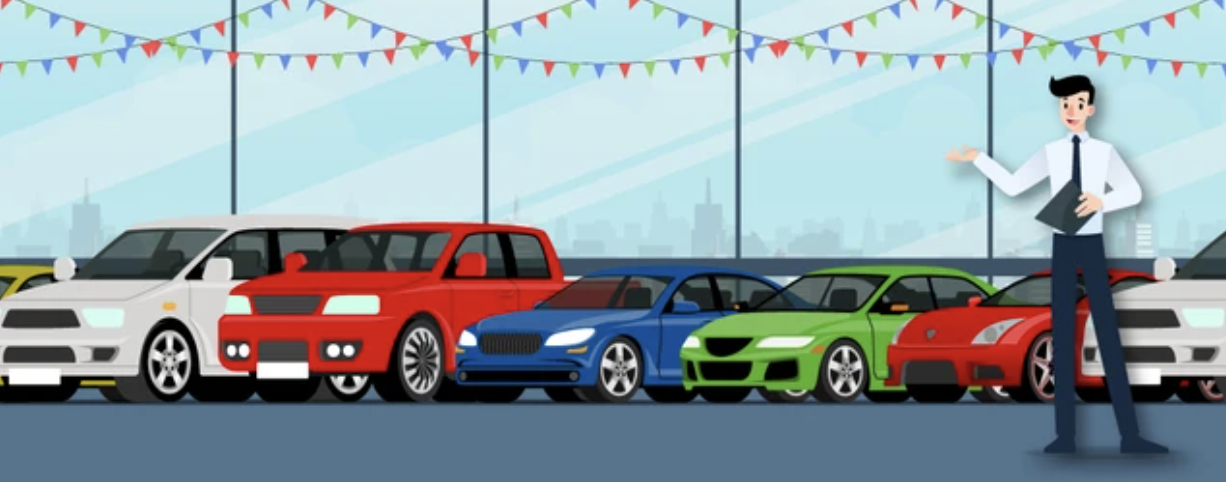](http://)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import os

# **Load the data into Pandas DataFrame**

In [2]:
# Import dataset into pandas dataframe
df = pd.read_csv("vehicles_dataset.csv")

In [3]:
# Displaying first 10 rows in the dataset
df.head(10)

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive
5,2024 Nissan Murano Platinum,\n \n Boasts 28 Highway MPG and 20...,Nissan,Murano,New,2024,46000.0,24V MPFI DOHC,6.0,Gasoline,3838.0,Automatic CVT,Platinum,SUV,4.0,White,Gray,All-wheel Drive
6,2024 Jeep Wagoneer Base,\n \n Alloy Wheels / Premium Whee...,Jeep,Wagoneer,New,2024,63862.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,5.0,8-Speed Automatic,Base,SUV,4.0,Bright White Clearcoat,Black,Rear-wheel Drive
7,2024 Ford F-350 Lariat Super Duty,\n \n Engine: 6.7L High Output Pow...,Ford,F-350,New,2024,89978.0,32V DDI OHV Turbo Diesel,8.0,Diesel,15.0,10-Speed Automatic,Lariat Super Duty,Pickup Truck,4.0,Carbonized Gray Metallic,Black Onyx,Four-wheel Drive
8,2024 Hyundai Tucson Hybrid Limited,NaN,Hyundai,Tucson Hybrid,New,2024,42230.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,5.0,6-Speed Automatic,Limited,SUV,4.0,White Pearl,Black,All-wheel Drive
9,2024 Jeep Grand Cherokee Altitude,\n \n Silver Zynith 2024 Jeep Gran...,Jeep,Grand Cherokee,New,2024,42773.0,"ar 3.6L V-6 DOHC, variable valve control, regu...",6.0,Gasoline,20.0,Automatic,Altitude,SUV,4.0,Silver Zynith,Global Black,Four-wheel Drive


# **Explore the Dataset**

In [4]:
# Number of rows and columns
df.shape

(1002, 18)

In [5]:
# Checking the datatype of atrributes in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   type            1002 non-null   object 
 5   year            1002 non-null   int64  
 6   price           979 non-null    float64
 7   engine          1000 non-null   object 
 8   cylinders       897 non-null    float64
 9   fuel            995 non-null    object 
 10  mileage         968 non-null    float64
 11  transmission    1000 non-null   object 
 12  trim            1001 non-null   object 
 13  body            999 non-null    object 
 14  doors           995 non-null    float64
 15  exterior_color  997 non-null    object 
 16  interior_color  964 non-null    object 
 17  drivetrain      1002 non-null   o

In [6]:
# Summarizing descripitive statistics of all attributes in the dataset
df.describe()

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


In [7]:
# Checking for missing values in the dataset
df.isnull().sum()

name                0
description        56
make                0
model               0
type                0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

> Choosing between the median and the mean to fill in missing values depends on the distribution of the data and the presence of outliers. Here’s a detailed explanation of why the median is often preferred over the mean:
> 
> Robustness to Outliers:
> 
> Median: The median is the middle value in a sorted list of numbers. It is not affected by extreme values (outliers) because it depends only on the order of the data, not their magnitude.
> Mean: The mean is the average of all values and can be significantly influenced by outliers. If the data contains outliers, the mean can be skewed, leading to an inaccurate representation of the central tendency.
> Skewed Distributions:
> 
> Median: For skewed distributions, the median better represents the center of the data. For example, in a dataset of vehicle prices, if there are a few luxury cars with very high prices, the mean would be higher than the typical vehicle price, while the median would still reflect the central tendency of the majority of vehicles.
> Mean: In skewed distributions, the mean can be misleading because it is pulled in the direction of the skew (towards the tail).

In [8]:
# Fill 'price' and 'mileage' with the median value
df['price'].fillna(df['price'].median(), inplace=True)
df['mileage'].fillna(df['mileage'].median(), inplace=True)

/tmp/ipykernel_18/1547025211.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].median(), inplace=True)
/tmp/ipykernel_18/1547025211.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [9]:
df.head()

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [10]:
# Fill other columns with the mode or a placeholder as appropriate
mode_fill_cols = ['engine', 'fuel', 'transmission', 'body', 'doors', 'exterior_color', 'interior_color']
for col in mode_fill_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
df['cylinders'].fillna(df['cylinders'].mode()[0], inplace=True)

/tmp/ipykernel_18/2431824144.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipykernel_18/2431824144.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

# **Exploratory Data Analysis**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


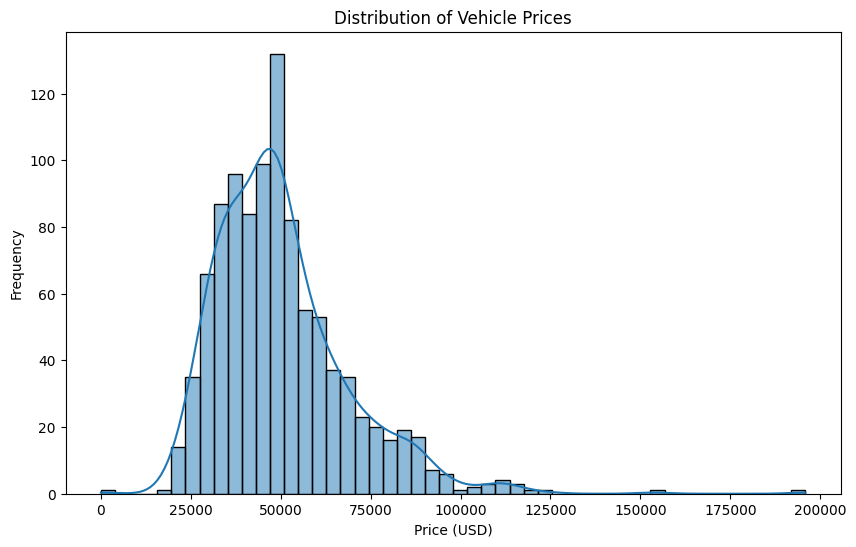

In [11]:
# Visualize the distribution of vehicle price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

> > ***From the above visualization we can see that maximum number of vehicles fall between 25000 - 70000 USD***

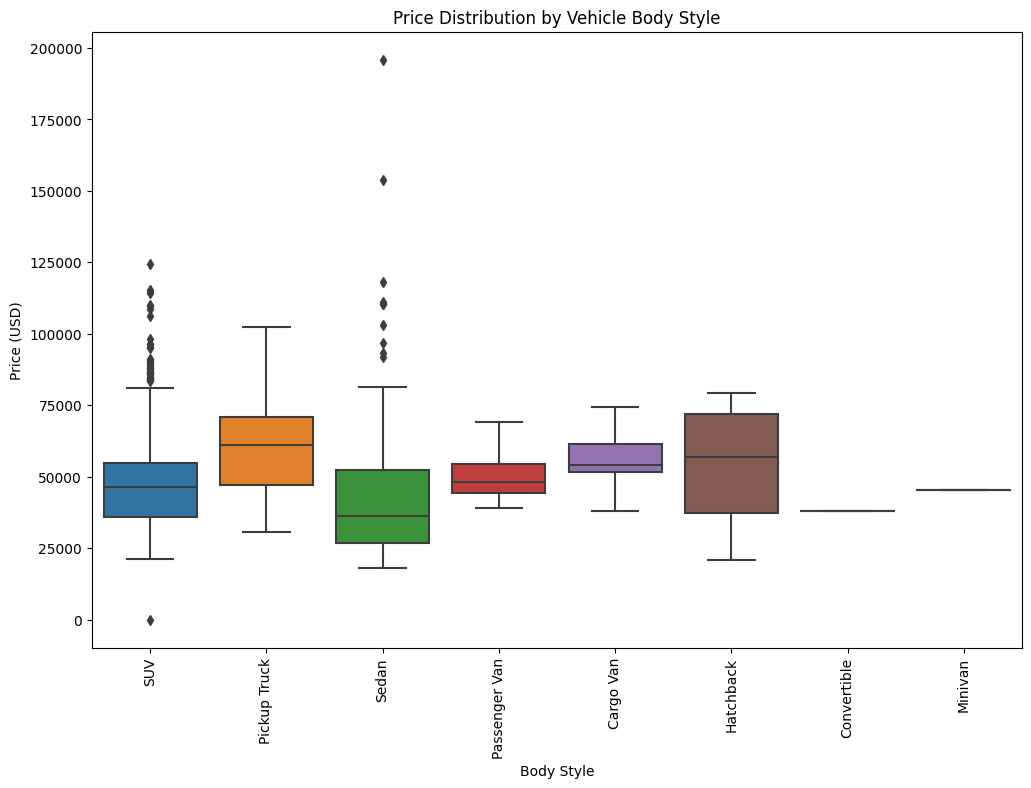

In [12]:
# Distribuion of Vehicle price and Body style
plt.figure(figsize=(12, 8))
sns.boxplot(x='body', y='price', data=df)
plt.title('Price Distribution by Vehicle Body Style')
plt.xlabel('Body Style')
plt.ylabel('Price (USD)')
plt.xticks(rotation=90)
plt.show()


> > ***From the above boxplot we can see that Pickup Truck and Hatchback are more expensive as compared to SUV and Sedan***

In [13]:
df.head()

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


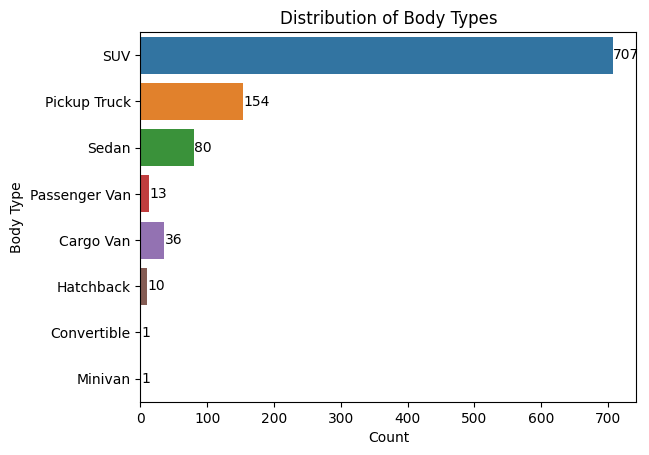

In [14]:
# Analysing count of different types of cars manufactured 
ax = sns.countplot(data=df, y='body')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Distribution of Body Types')
plt.xlabel('Count')
plt.ylabel('Body Type')
plt.show()

> > > ***We can see that, SUV have highest number of production followed by Pickup Truck***

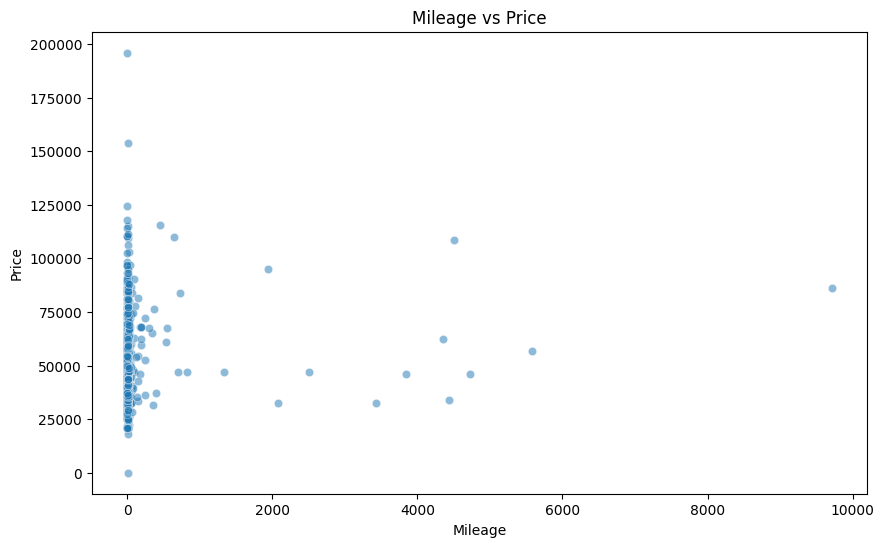

In [15]:
# Scatter plot for mileage vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='mileage', y='price', alpha=0.5)
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


> > ***We can see that, the range of Mileage of vehicle is constant but there is an increase in the amount of Price of vehicles***

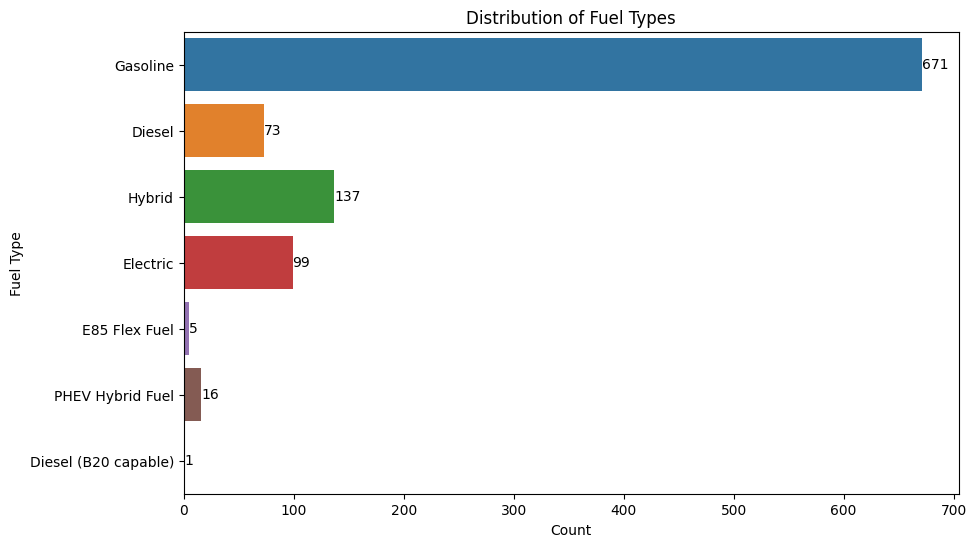

In [16]:
# Analyzing the distribution of Fuel types
plt.figure(figsize=(10, 6))
bx = sns.countplot(y='fuel', data=df)
for label in bx.containers:
    bx.bar_label(label)
plt.title('Distribution of Fuel Types')
plt.xlabel('Count')
plt.ylabel('Fuel Type')
plt.show()

> > > > ***We can see that, Gasoline fuel type has the highest amount of production followed by Hybrid and Electric***

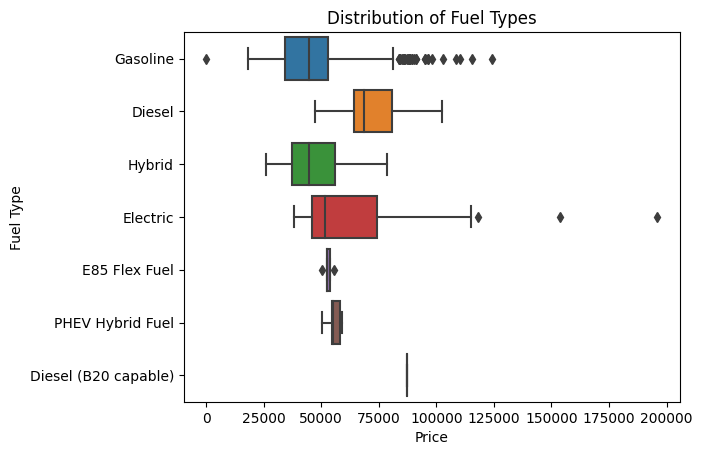

In [17]:
# Analysing distribution of fuel type and price of vehicle
sns.boxplot(data=df, y='fuel', x='price')
plt.title('Distribution of Fuel Types')
plt.xlabel('Price')
plt.ylabel('Fuel Type')
plt.show()

> > > ***We can see that Vehicles having fuel type Diesel are more expensive as compared to vehicles with Gasoline***

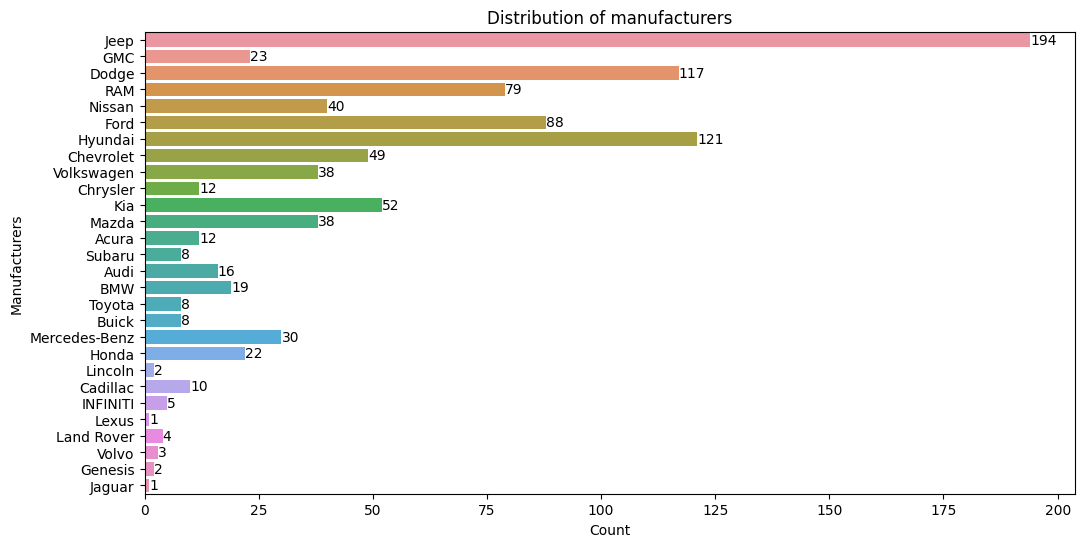

In [18]:
# Analyzing the distribution of manufacturers
plt.figure(figsize=(12, 6))
cx = sns.countplot(data=df, y='make')
for label in cx.containers:
    cx.bar_label(label)
plt.title('Distribution of manufacturers')
plt.xlabel('Count')
plt.ylabel('Manufacturers')
plt.show()

> > > ***We can see that, Jeep has more production followed by Hyundai and Dodge whereas the least being Jaguar, Lexus, Genesis and Lincoln***

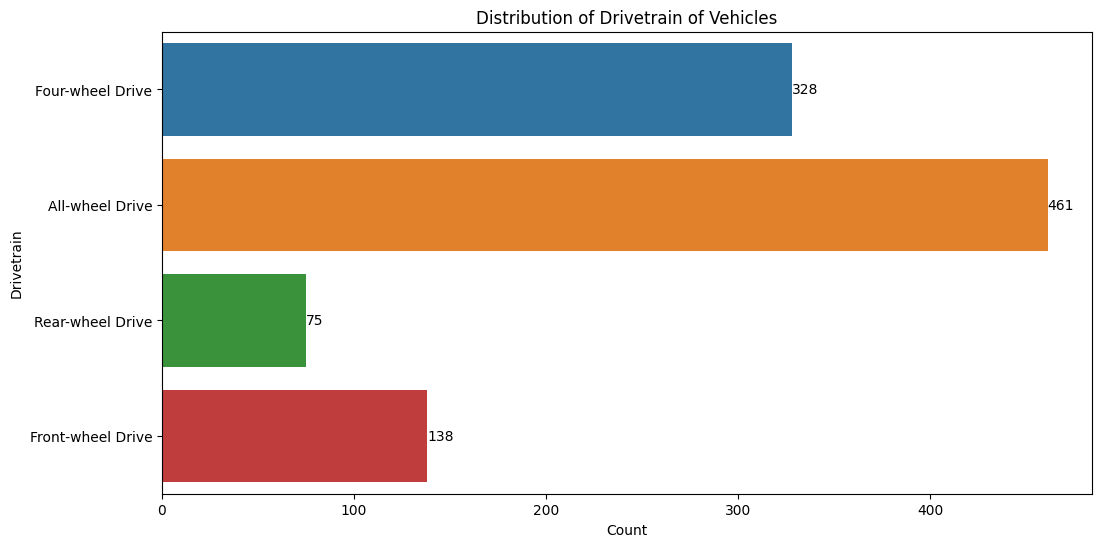

In [19]:
# Analyzing the distribution of manufacturers
plt.figure(figsize=(12, 6))
dx = sns.countplot(data=df, y='drivetrain')
for label in dx.containers:
    dx.bar_label(label)
plt.title('Distribution of Drivetrain of Vehicles')
plt.xlabel('Count')
plt.ylabel('Drivetrain')
plt.show()

> > > > ***We can see that, All-wheel Drive has the highest production and the least being rear-wheel Drive***

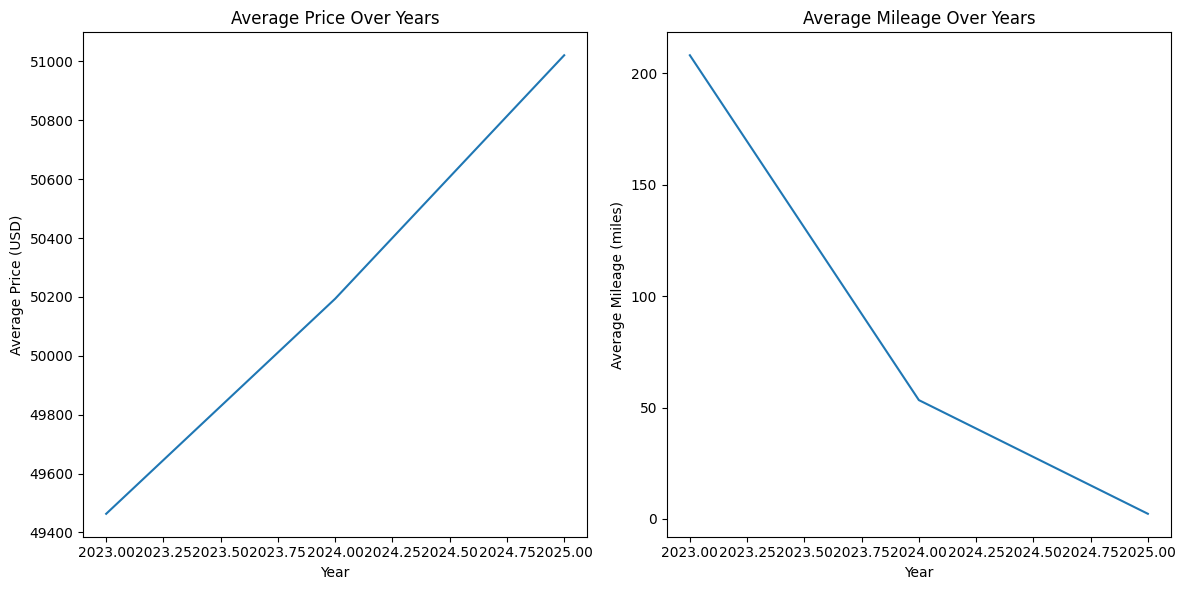

In [20]:
# Plotting graph of Average Price over the years and Average Mileage over the years
plt.figure(figsize=(12, 6))
avg_price_year = df.groupby('year')['price'].mean()
avg_mileage_year = df.groupby('year')['mileage'].mean()

plt.subplot(1, 2, 1)
avg_price_year.plot(kind='line')
plt.title('Average Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')

plt.subplot(1, 2, 2)
avg_mileage_year.plot(kind='line')
plt.title('Average Mileage Over Years')
plt.xlabel('Year')
plt.ylabel('Average Mileage (miles)')

plt.tight_layout()
plt.show()


> > ***We can see that, there is a linear relationship between average price and year of production, whereas we see a negative relationship betweeen average mileage and year of production***

In [21]:
df.head()

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


# **Feature Engineering**

In [22]:
# Example: Extracting the brand from the name
df['brand'] = df['name'].apply(lambda x: x.split(' ')[0])

# Convert categorical features to numerical using one-hot encoding
categorical_features = ['make', 'model', 'fuel', 'transmission', 'body', 'exterior_color', 'interior_color', 'drivetrain', 'brand']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Dropping irrelevant features from the dataset
df.drop(['name','description','type', 'engine', 'doors', 'trim'], axis=1, inplace=True)


# **Feature Selection**

In [23]:
# Separate target and features
X = df.drop('price', axis=1)
y = df['price']

# Select the top 10 features
selector = SelectKBest(f_regression, k=10)
selector.fit(X, y)
X_new = selector.transform(X)

# Display selected features
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['cylinders', 'make_BMW', 'make_Mercedes-Benz', 'make_RAM', 'model_3500',
       'model_i7', 'fuel_Gasoline', 'interior_color_Caramel',
       'drivetrain_Four-wheel Drive', 'drivetrain_Front-wheel Drive'],
      dtype='object')


# **Model Selection and Training**

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse}, R2: {r2}')

Linear Regression - MSE: 153431811.05287004, R2: 0.3980769112951099
Decision Tree - MSE: 125761138.25025894, R2: 0.5066307810930153
Random Forest - MSE: 126028763.65597792, R2: 0.5055808690198875


> **Mean Squared Error (MSE)** measures the average squared difference between the actual and predicted values. It is a measure of the quality of the estimator—it is always non-negative, and values closer to zero are better.
> 
> **R-squared (R²)** is a statistical measure that represents the proportion of the variance for the dependent variable (price) that's explained by the independent variables in the model. R² ranges from 0 to 1, where:
> 
> **0 indicates** that the model explains none of the variability of the response data around its mean.
> 
> **1 indicates** that the model explains all the variability of the response data around its mean.
> 
> 
> **Interpretation of the Results**
> 
> > > **Linear Regression - R²: 0.398**
> 
> > > The Linear Regression model has the highest MSE and the lowest R² among the three models. This indicates that it has the largest average squared error in predictions and explains around 39.8% of the variance in the price data.
> 
> > > **Decision Tree - R²: 0.507**
> 
> > > The Decision Tree model has a lower MSE compared to Linear Regression, indicating it makes more accurate predictions on average. Its R² value of 0.507 means it explains about 50.7% of the variance in the price data.
> 
> > > **Random Forest - R²: 0.504**
> 
> > > The Random Forest model has a slightly higher MSE than the Decision Tree but significantly lower than Linear Regression. Its R² value of 0.504 indicates it explains about 50.4% of the variance in the price data. Despite being slightly less accurate than the Decision Tree in this case, Random Forests often generalize better and can handle more complex patterns.
> 
> 
> 
> 
> > > > > > ***Decision Tree appears to be the best model in terms of MSE and R², indicating it provides the most accurate predictions and explains the highest proportion of variance in the price data.***

# **Model Evaluation**

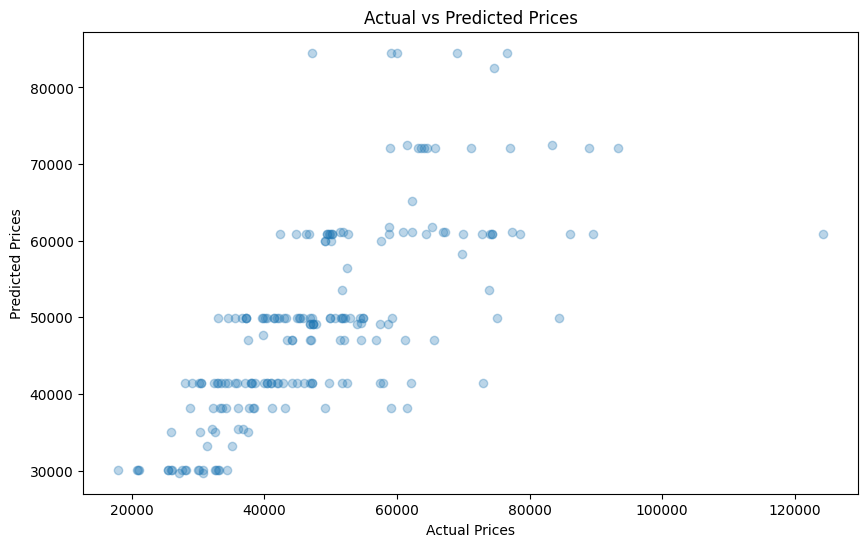

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


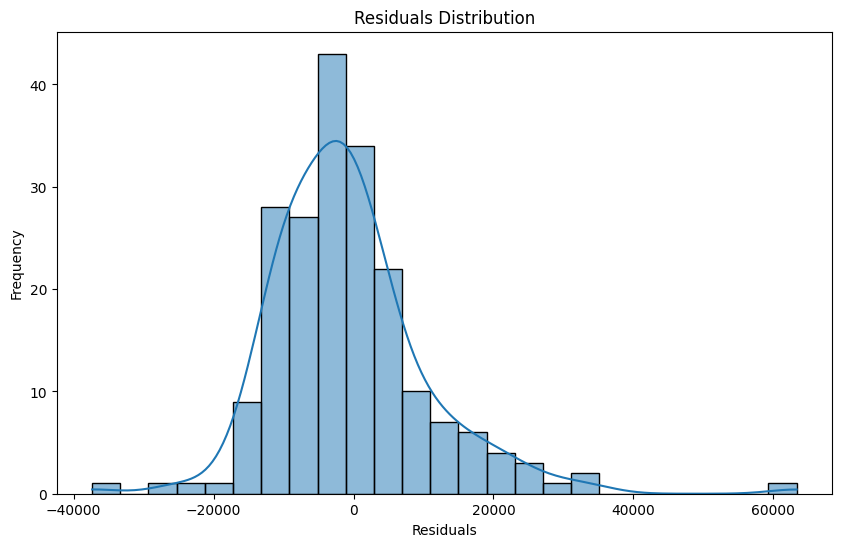

In [25]:
# Plotting actual vs predicted prices for the best model (e.g., Random Forest)
best_model = models['Random Forest']
y_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# **Model Tuning**

> **Hyperparameter Tuning for Decision Tree and Random Forest**

In [26]:
# Decision Tree hyperparameters
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest hyperparameters
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search for Decision Tree
dt_grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=dt_param_grid, cv=3, n_jobs=-1, verbose=2)
dt_grid_search.fit(X_train, y_train)

# Grid search for Random Forest
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# Best parameters and scores
print("Decision Tree Best Parameters:", dt_grid_search.best_params_)
print("Decision Tree Best Score:", dt_grid_search.best_score_)
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("Random Forest Best Score:", rf_grid_search.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=Non

# **Model Validation**

> **Used Cross-validation to ensure model generalizes well**

In [27]:
# Best parameters for Decision Tree and Random Forest
dt_best_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
rf_best_params = {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

# Retrain Decision Tree
best_dt_model = DecisionTreeRegressor(**dt_best_params)
best_dt_model.fit(X_train, y_train)

# Retrain Random Forest
best_rf_model = RandomForestRegressor(**rf_best_params)
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_split=10)

In [28]:
# Predictions
dt_y_pred = best_dt_model.predict(X_test)
rf_y_pred = best_rf_model.predict(X_test)

# Evaluation metrics for Decision Tree
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)
print(f'Tuned Decision Tree - MSE: {dt_mse}, R2: {dt_r2}')

# Evaluation metrics for Random Forest
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f'Tuned Random Forest - MSE: {rf_mse}, R2: {rf_r2}')

Tuned Decision Tree - MSE: 126121141.75455607, R2: 0.5052184636618116
Tuned Random Forest - MSE: 124788807.73560543, R2: 0.5104452976695065
